### Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

### Load the dataset

In [3]:
data = pd.read_csv("C:/University/Projects/cnn/featureCNN/age_gender.csv")

# Putting pixels for each image in an array
"""
Lambda Function: The function being applied is a lambda function, which is an anonymous, inline function defined using the lambda keyword. 
In this case, the lambda function takes a single argument x, which represents each element in the "pixels" column.

String Splitting: Inside the lambda function, x.split() is called. 
This method splits the string x into a list of substrings based on whitespace. 
For example, if x is "255 0 0 255", x.split() would return ["255", "0", "0", "255"].

NumPy Array Conversion: The list of substrings is then converted into a NumPy array using np.array(). 
The dtype="float32" argument specifies that the elements of the resulting array should be of type float32. 
This is important for numerical computations, especially in machine learning, 
where consistent data types are crucial for performance and compatibility with various libraries.
"""
data["pixels"] = data["pixels"].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


### I. Some distributions for insight on the data

#### **First**, we will be normalizing the data. The normalization process involves converting pixel values from a range of 0-255 to a range of 0-1. This is a common preprocessing step in image processing and machine learning tasks, as it helps to standardize the input data.

In [4]:
# Normalize data: from 0-255 to 0-1
data["pixels"] = data["pixels"].apply(lambda x: x/255)

# Calculate the distributions
age_dist = data["age"].value_counts()
ethnicity_dist = data["ethnicity"].value_counts()
gender_dist = data["gender"].value_counts().rename(index={0:"Male", 1:"Female"})

def dist_plot(x, y, name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

### We will be generating some distributions for some insight on the data. Let's see exactly what we are working with exactly!

In [5]:
# Age distribution
dist_plot(x=age_dist.index, y=age_dist.values, name="Age Distribution")

In [6]:
# Ethnicity distribution
dist_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name="Ethnicity Distribution")

In [7]:
# Gender distibution
dist_plot(x=gender_dist.index, y=gender_dist.values, name="Gender Distribution")

### II. Reshaping the pixels from data, from 1D to 3D

**Convert arrays to lists for better handling**: The code starts by converting the pixel data from the dataset into lists.<br>

Here, **data["pixels"]** is converted to a list and then to a NumPy array for both X and Y. 
This ensures that the pixel data is in a format that can be easily manipulated and processed.

In [8]:
# Convert arrays to lists for better handling
X = np.array(data["pixels"].tolist())
Y = np.array(data["pixels"].tolist())

# Reshape data
X = X.reshape(X.shape[0], 48, 48, 1)

#Y = Y.reshape(Y.shape[0], 48, 47, 1)

**Next step**: reshape the data to fit the expected input shape for the neural network.

**First dimension**: X.shape[0] preserves the number of samples in the dataset.

**Second and third dimensions**: Set to 48x48, which represents the height and width of each image.

**Fourth dimension**: Set to 1, indicating that the images are grayscale (i.e., they have only one color channel).

This reshaping is crucial for ensuring that the data is in the correct format!

### Showcase sample images

#### In order to get a feeling on how the images actually look like, we plot some of them below.

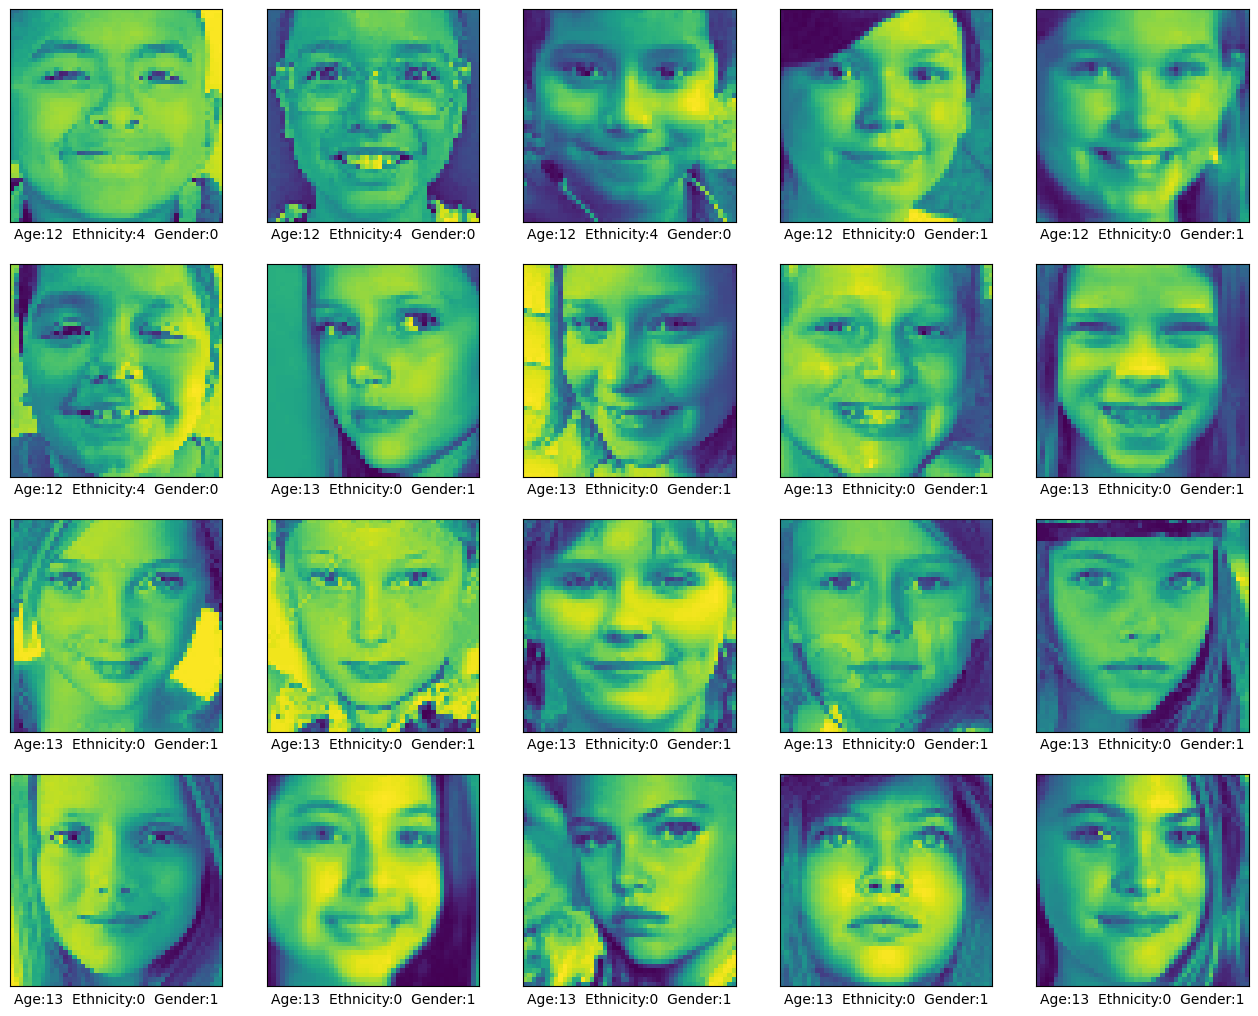

In [9]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()

**Question**: Why are the imagesgre blue/green scale rather than greyscale as we mentioned above?

<details>
  <summary>Answer</summary>
  
  The images appear blue/grey scale rather than purely greyscale because the plt.imshow() function in Matplotlib 
uses a default colormap (viridis) which maps the pixel intensity values to colors.

To show them in gray we need to add the "gray" parameter to the plt.imshow() function!
</details>

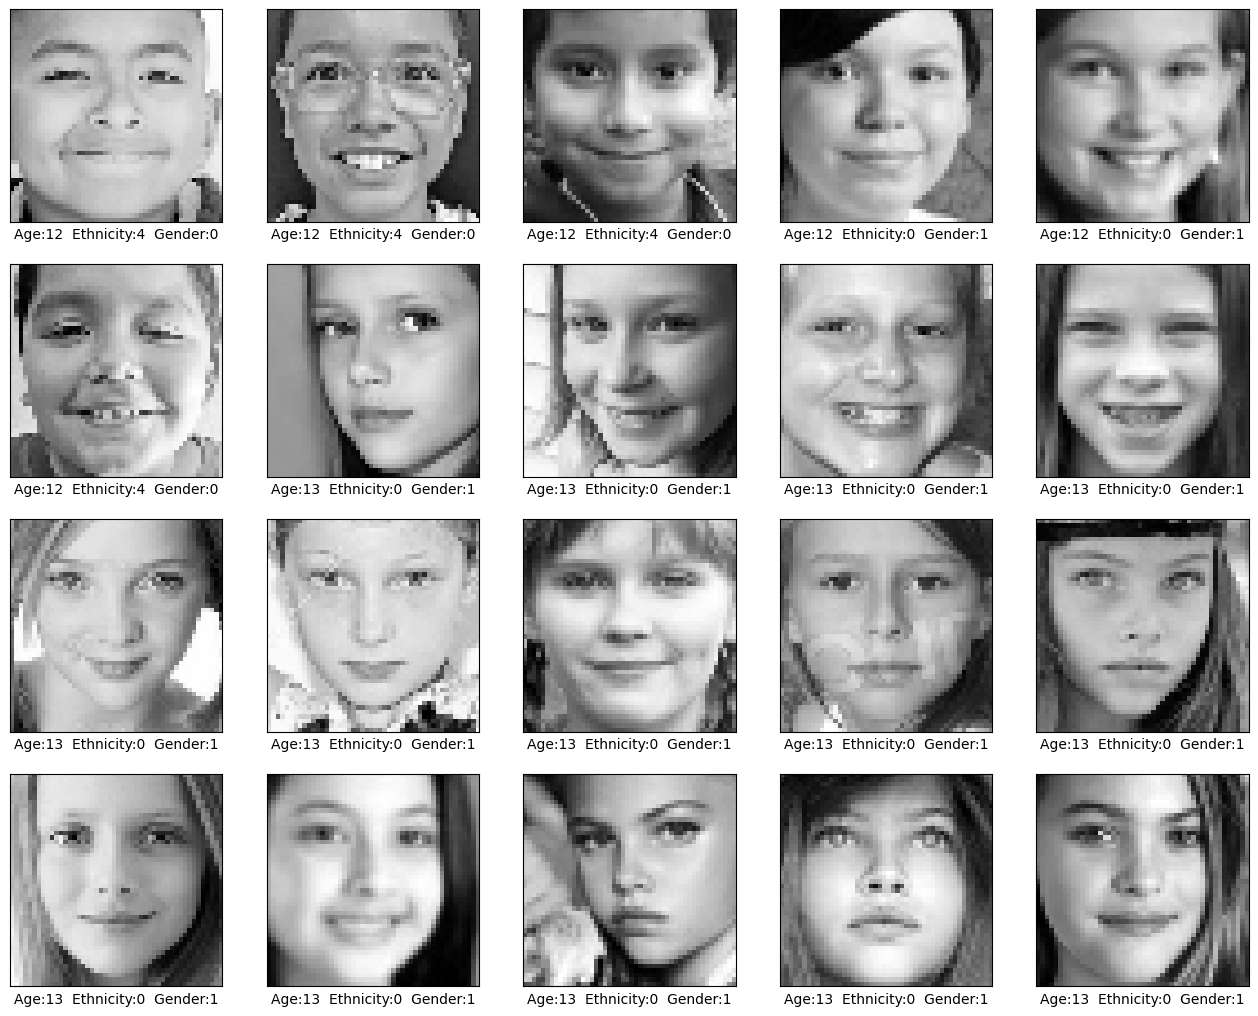

In [10]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48), "grey")
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()

#### That's more like it!

### III. Actual model for prediction!

#### Split the data into **train** and **test**

In [11]:
y = data["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=37)

We just built 2 datasets. A **training** dataset and  a **testing** dataset.

**Training dataset**:
A subset of the data used to train the model, allowing it to learn patterns and relationships.

**Testing dataset**:
A separate subset of the data used to evaluate the model's performance on unseen data, ensuring it generalizes well.

**Test_size**: The test_size parameter is set to 0.22, which means that 22% of the data will be allocated to the test set. The remaining 78% of the data will be used for training the model.

**Random state**: The random_state parameter ensures that the data is shuffled in the same way every time the code is run. This makes the results reproducible.

---------------------------------------------------------------------------------------------------------------------


**Splitting the data**: The train_test_split function from sklearn.model_selection is used to split the dataset into training and testing sets.

**y = data["gender"]**: The target variable y is set to the gender column from the dataset.

**X_train, X_test**: These variables will hold the training and testing features, respectively.

**y_train, y_test**: These variables will hold the training and testing labels, respectively.

---------------------------------------------------------------------------------------------------------------------


#### Build and train the model: for GENDER

#### We will be using the following model:
**Step 1**: Add **Input layer**

Defines the input shape of the data, which is (48, 48, 1) indicating 48x48 pixel images with 1 channel (grayscale).

**Step 2**: Add **Convolutional  Layer**

Applies 32 convolution filters of size (3, 3) to the input data.

Uses the ReLU activation function.

The input_shape parameter specifies the input shape of the data.

**Step 3**: **Normalize the batch**

Normalizes the output of the previous layer to improve training speed.

**Step 4**: Add **Max pooling**

Enhancing layer that takes all the maximum values over a (2, 2) window.

Improves and intensifies result.

*Example?

**Step 5**: Add **Flattening layer**

Flattens the input to a 1D array, preparing it for the dense layers.

**Step 6**: Add **Dense layer**

Fully connected layer with 64 neurons and ReLU activation function.

**Step 7**: Add **Dropout layer**

Randomly sets 50% of the input units to 0 at each update during training to prevent overfitting.

**Step 8**: Add **Dense (output) layer**

Fully connected layer with 1 neuron and sigmoid activation function.

Suitable for binary classification.


In [12]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48, 48, 1)),
    # Convolutional layer: filters=, kernel_size=(), activation=, input_shape=()
    L.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    # Max Pooling: pool_size=
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation="relu"),
    L.Dropout(rate=0.5),
    L.Dense(1, activation="sigmoid")
])

model.compile(optimizer="sgd", 
              loss=tf.keras.losses.BinaryCrossentropy(()),
              metrics=["accuracy"])

# Stop training the model when validation loss reaches less than 0.27
class myCallback(tf.keras.callbacks.Callback):
    def onEpochEnd(self, epoch, logs={}):
        if(logs.get("val_loss") < 0.2700):
            print("\nReached 0.2700 value loss so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1083456   
                                                                 
 dropout (Dropout)           (None, 64)                0

#### Then we compiled the model using:

An **Optimizer**

Stochastic Gradient Descent(sgd) is used to update the model weights.

A **Loss function**

BinaryCrossentropy is used for binary classification tasks.

A **Metric**

In our case accuracy to evaluate the model's performance.

#### Then use a callback function

A callback is a set of functions to be applied at given stages of the training process, such as at the end of an epoch, to customize and control the training behavior. In our case, the custom callback class that stops training when the validation loss reaches below 0.2700.



#### Fit the model

Fitting the model involves feeding the training data into the model and adjusting the model's parameters to minimize the error between the predicted and actual outcomes. 

This process iteratively updates the model's weights to improve its accuracy on the training data. 

-> The goal is to enable the model to generalize well to new, unseen data.

In [13]:
history = model.fit(
    X_train, y_train, epochs = 20, batch_size=64, validation_split=0.1, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 10s 34ms/step - loss: 0.4532 - accuracy: 0.7819 - val_loss: 0.5677 - val_accuracy: 0.8269
Epoch 2/20
260/260 [==============================] - 7s 28ms/step - loss: 0.3461 - accuracy: 0.8450 - val_loss: 0.3883 - val_accuracy: 0.8518
Epoch 3/20
260/260 [==============================] - 8s 29ms/step - loss: 0.3146 - accuracy: 0.8606 - val_loss: 0.3280 - val_accuracy: 0.8534
Epoch 4/20
260/260 [==============================] - 8s 30ms/step - loss: 0.2901 - accuracy: 0.8722 - val_loss: 0.3084 - val_accuracy: 0.8637
Epoch 5/20
260/260 [==============================] - 8s 30ms/step - loss: 0.2731 - accuracy: 0.8813 - val_loss: 0.2997 - val_accuracy: 0.8686
Epoch 6/20
260/260 [==============================] - 7s 29ms/step - loss: 0.2591 - accuracy: 0.8891 - val_loss: 0.3011 - val_accuracy: 0.8740
Epoch 7/20
260/260 [==============================] - 8s 31ms/step - loss: 0.2472 - accuracy: 0.8951 - val_loss: 0.2927 - val_accuracy: 0.871

### Evaluating the training history

In [14]:
fig = px.line(
    history.history, y=["loss", "val_loss"],
    labels={"index" : "epoch", "value" : "loss"},
    title="Training history")

fig.show()

In [15]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2715793550014496
Test Accuracy: 0.8901457190513611


### Prediction visualization!!!

In [16]:
results = model.predict(X_test)
type(results)

results = (results > 0.25).astype(int).flatten()

results = pd.Series(results, name="Label")

# Reset index of y_test with new index column name "newIndex"
y_test = y_test.reset_index()


163/163 [==============================] - 6s 33ms/step


#### Plot the prediction :D

629
Iteration: 1
Actual value: 1


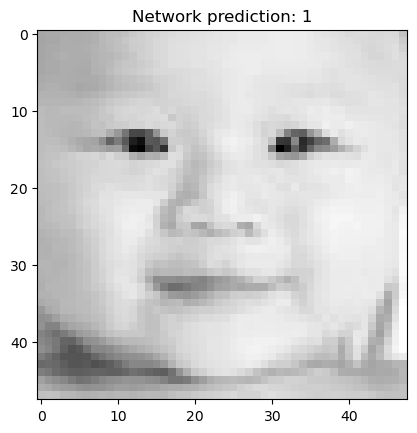

400
Iteration: 2
Actual value: 1


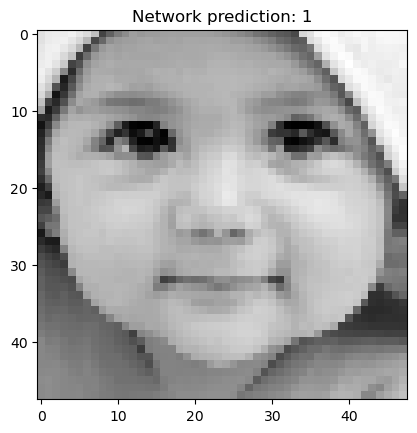

1078
Iteration: 3
Actual value: 0


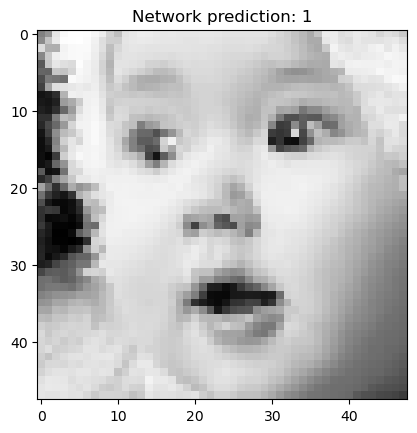

768
Iteration: 4
Actual value: 0


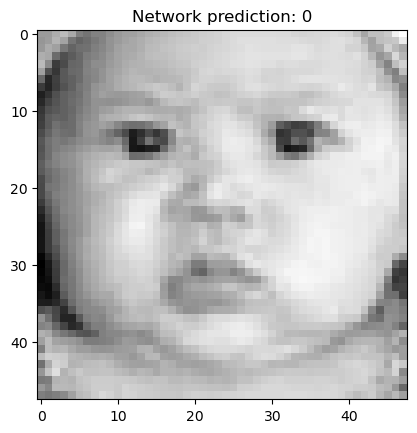

30
Iteration: 5
Actual value: 0


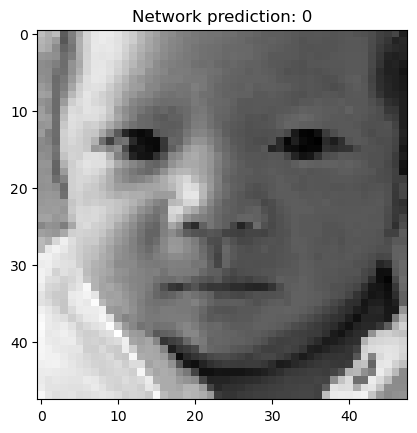

35
Iteration: 6
Actual value: 0


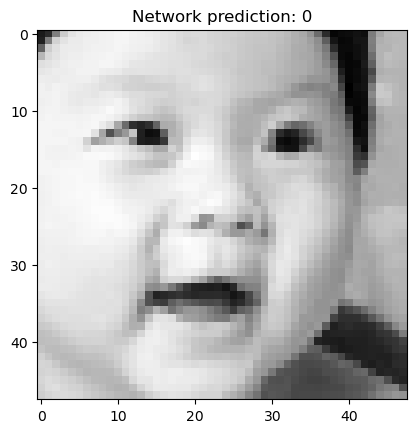

761
Iteration: 7
Actual value: 0


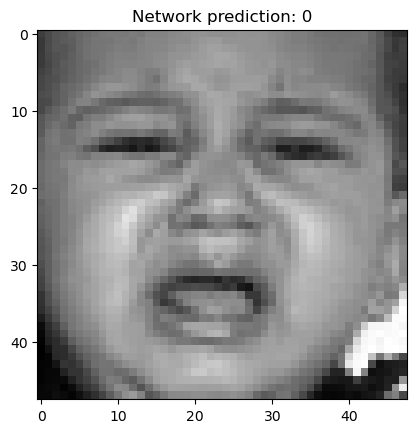

281
Iteration: 8
Actual value: 1


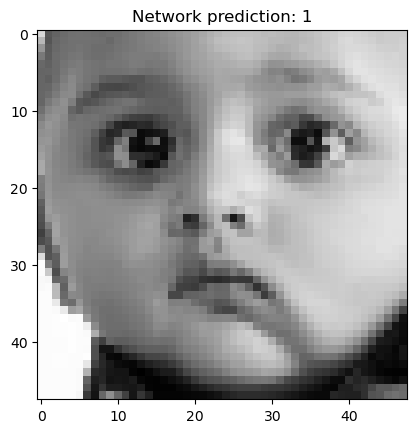

1244
Iteration: 9
Actual value: 0


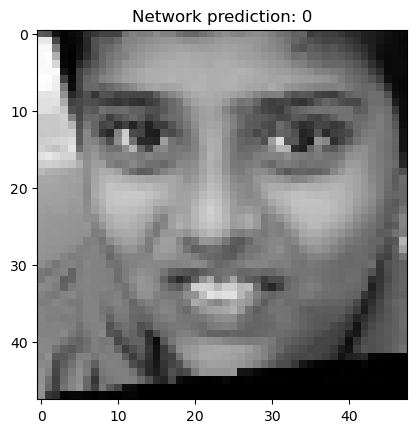

644
Iteration: 10
Actual value: 1


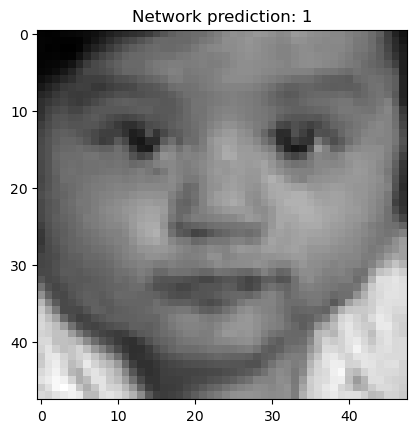

682
Iteration: 11
Actual value: 1


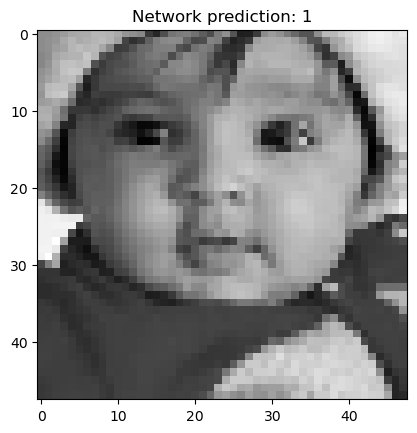

763
Iteration: 12
Actual value: 0


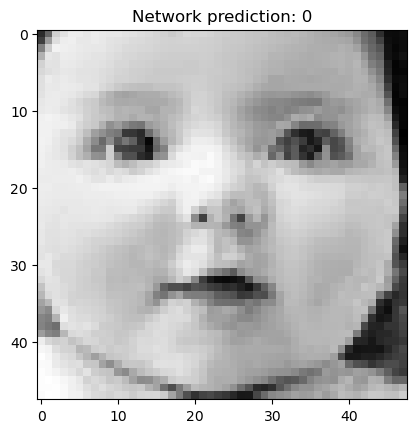

448
Iteration: 13
Actual value: 1


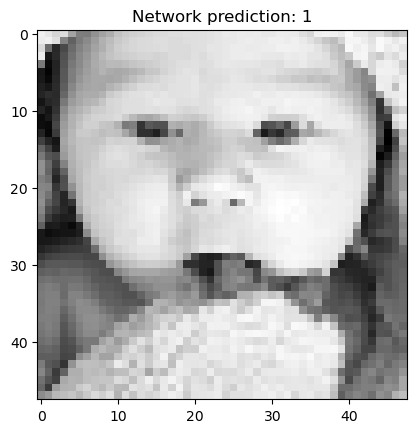

992
Iteration: 14
Actual value: 0


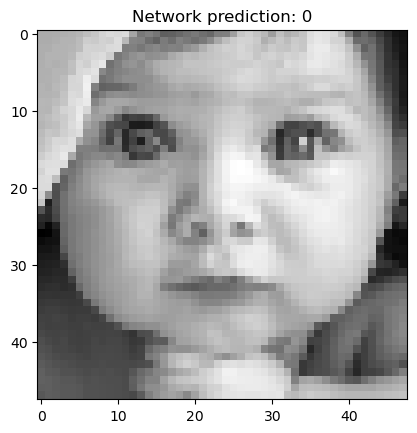

1395
Iteration: 15
Actual value: 0


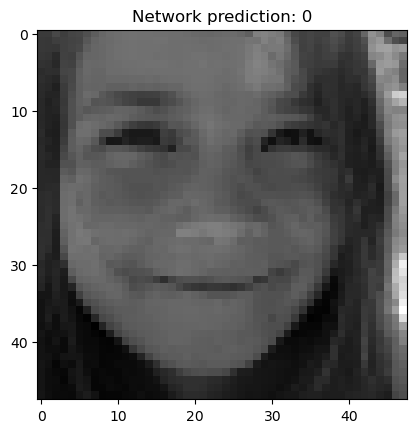

402
Iteration: 16
Actual value: 1


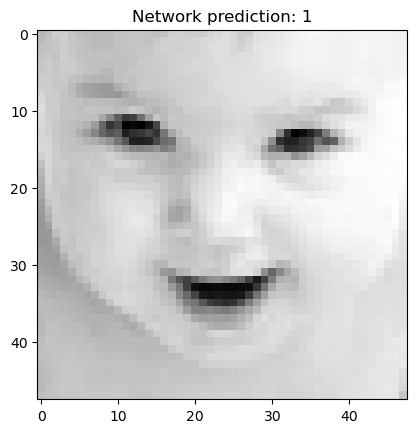

72
Iteration: 17
Actual value: 0


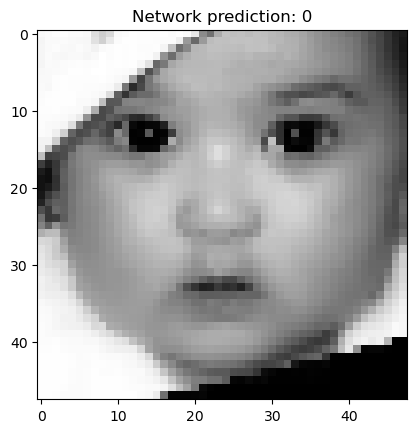

669
Iteration: 18
Actual value: 0


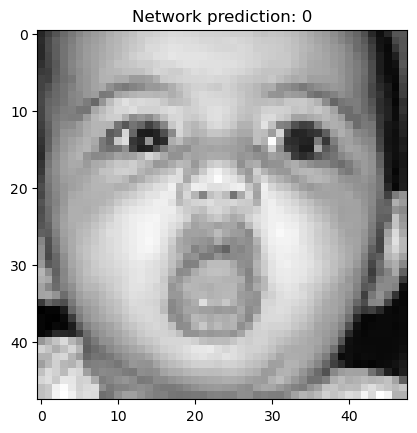

1361
Iteration: 19
Actual value: 1


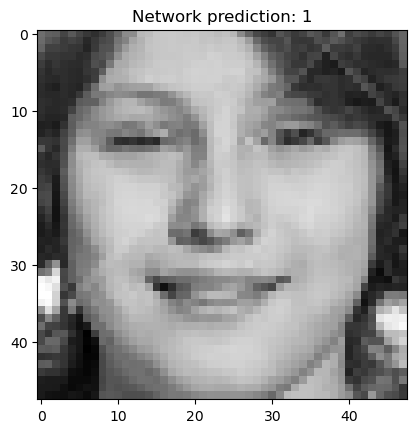

358
Iteration: 20
Actual value: 1


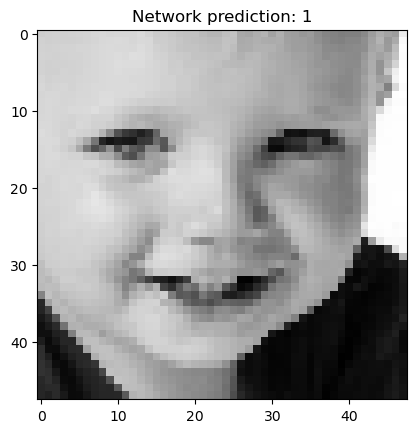

19


In [17]:
import random as random
ct = 0
for i in range(1500, 1520):
    thisRandom = random.randrange(0, 1500)
    print(thisRandom)
    print("Iteration: " + str(i - 1499))
    print("Actual value: " + str(y_test["gender"][thisRandom]))
    plt.figure()
    plt.imshow(X[thisRandom][:, :, 0], cmap='gray')
    plt.title(f"Network prediction: {results[thisRandom]}")
    plt.show()
    if (y_test["gender"][thisRandom] == results[thisRandom]):
        ct = ct + 1
print(ct)

#### Build and train the model: for ETHNICITY

Split data into **Train** and **Test**


In [18]:
y = data['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37
)

Build and train the model

In [19]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Stop training when validation accuracy reach 79%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.790):
            print("\nReached 79% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

This time we stop when val_accuracy > 0.790 because it is harder to predict, so the model needs more time to train on the dataset


#### Fit the model

In [20]:
history = model.fit(
    X_train, y_train, epochs=16, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/16
260/260 [==============================] - 11s 38ms/step - loss: 1.2828 - accuracy: 0.5005 - val_loss: 0.9986 - val_accuracy: 0.6312
Epoch 2/16
260/260 [==============================] - 9s 33ms/step - loss: 1.0309 - accuracy: 0.6293 - val_loss: 0.8452 - val_accuracy: 0.7047
Epoch 3/16
260/260 [==============================] - 9s 33ms/step - loss: 0.9306 - accuracy: 0.6716 - val_loss: 0.7788 - val_accuracy: 0.7263
Epoch 4/16
260/260 [==============================] - 8s 31ms/step - loss: 0.8623 - accuracy: 0.6975 - val_loss: 0.7513 - val_accuracy: 0.7355
Epoch 5/16
260/260 [==============================] - 9s 36ms/step - loss: 0.8321 - accuracy: 0.7135 - val_loss: 0.6959 - val_accuracy: 0.7582
Epoch 6/16
260/260 [==============================] - 9s 35ms/step - loss: 0.7823 - accuracy: 0.7288 - val_loss: 0.6792 - val_accuracy: 0.7658
Epoch 7/16
260/260 [==============================] - 9s 35ms/step - loss: 0.7518 - accuracy: 0.7421 - val_loss: 0.6944 - val_accuracy: 0.763

Training history

In [21]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.6244031190872192
Test Accuracy: 0.7914110422134399


### Prediction and vizualization!

In [22]:
results = model.predict(X_test)
type(results)


#TODO: figure out result threshold
results = (results > 0.25).astype(int).flatten()

results = pd.Series(results, name="Label")

# Reset index of y_test with new index column name "newIndex"
#y_test = y_test.reset_index()

print(y_test.head())

163/163 [==============================] - 6s 33ms/step
5451     1
5935     2
14860    1
7132     1
858      4
Name: ethnicity, dtype: int64


In [23]:
results = model.predict(X_test)
type(results)

results = results.astype(int).flatten()

results = pd.Series(results, name="Label")

# Reset index of y_test with new index column name "newIndex"
#y_test = y_test.reset_index()

print(results.head())

163/163 [==============================] - 5s 32ms/step
0   -5
1    6
2   -5
3   -5
4   -5
Name: Label, dtype: int32


In [24]:
import random as random
ct = 0
for i in range(1500, 1520):
    thisRandom = random.randrange(0, 1500)
    print(thisRandom)
    print("Iteration: " + str(i - 1499))
    print("Actual value: " + str(y_test["ethnicity"][thisRandom]))
    plt.figure()
    plt.imshow(X[thisRandom][:, :, 0], cmap='gray')
    plt.title(f"Network prediction: {results[thisRandom]}")
    plt.show()
    if (y_test["ethnicity"][thisRandom] == results[thisRandom]):
        ct = ct + 1
print(ct)

81
Iteration: 1


KeyError: 'ethnicity'

#### Build and train model for AGE

Split data into **Train** and **Test**

In [25]:
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37
)

Build and train the model

In [26]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48, 48, 1)),
    L.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    L.BatchNormalization(), 
    L.MaxPooling2D((2, 2)), 
    L.Conv2D(64, (3, 3), activation="relu"), 
    L.MaxPooling2D((2, 2)), 
    L.Conv2D(128, (3, 3), activation="relu"), 
    L.MaxPooling2D((2, 2)), 
    L.Flatten(), 
    L.Dense(64, activation="relu"),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

Fit the model

In [27]:
history = model.fit(
    X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 13s 48ms/step - loss: 362.2988 - mae: 14.5216 - val_loss: 1056.2185 - val_mae: 26.7884
Epoch 2/20
260/260 [==============================] - 11s 42ms/step - loss: 216.4017 - mae: 11.0766 - val_loss: 623.1827 - val_mae: 19.9774
Epoch 3/20
260/260 [==============================] - 11s 43ms/step - loss: 184.0840 - mae: 10.1015 - val_loss: 134.2997 - val_mae: 8.8976
Epoch 4/20
260/260 [==============================] - 11s 43ms/step - loss: 167.3756 - mae: 9.5850 - val_loss: 226.2833 - val_mae: 10.7672
Epoch 5/20
260/260 [==============================] - 11s 43ms/step - loss: 155.1377 - mae: 9.1943 - val_loss: 113.7192 - val_mae: 7.6680
Epoch 6/20
260/260 [==============================] - 11s 42ms/step - loss: 149.8588 - mae: 9.0566 - val_loss: 117.2958 - val_mae: 8.0409
Epoch 7/20
260/260 [==============================] - ETA: 0s - loss: 139.0450 - mae: 8.6987
Reached 110 val_loss so cancelling training!
260/260 [==================

In [28]:
mse, mae = model.evaluate(X_test,y_test,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 99.81893920898438
Test Mean absolute error: 7.504621982574463


In [31]:
results = model.predict(X_test)
type(results)

results = results.astype(int).flatten()

results = pd.Series(results, name="Label")

# Reset index of y_test with new index column name "newIndex"
y_test = y_test.reset_index()

print(results.head())

163/163 [==============================] - 2s 10ms/step
0    22
1    35
2    28
3    27
4     3
Name: Label, dtype: int32


Iteration: 1501
Actual value: 22


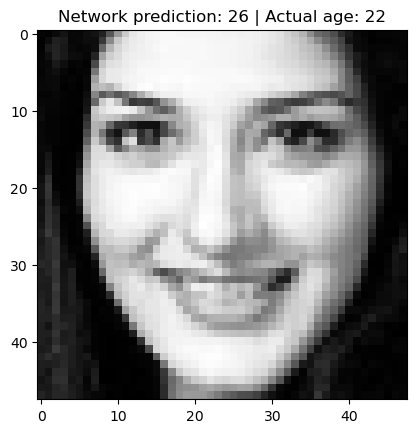

Iteration: 1502
Actual value: 1


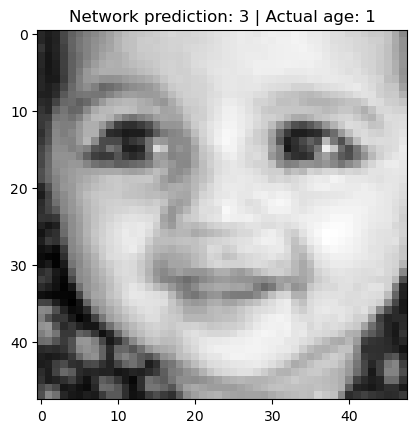

Iteration: 1503
Actual value: 23


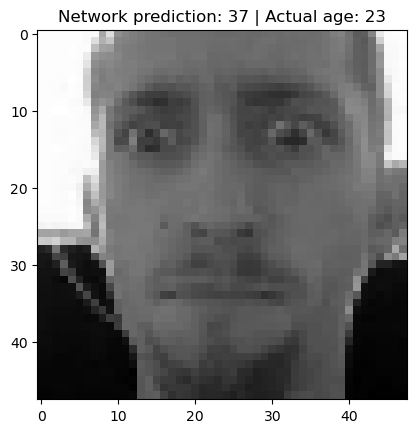

Iteration: 1504
Actual value: 1


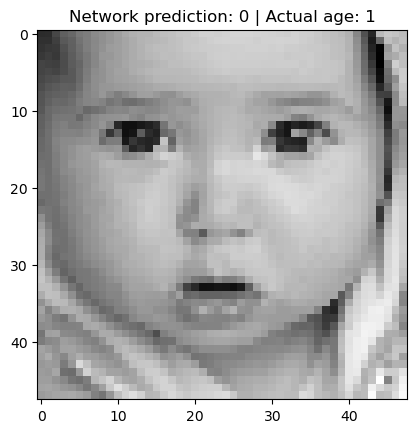

Iteration: 1505
Actual value: 26


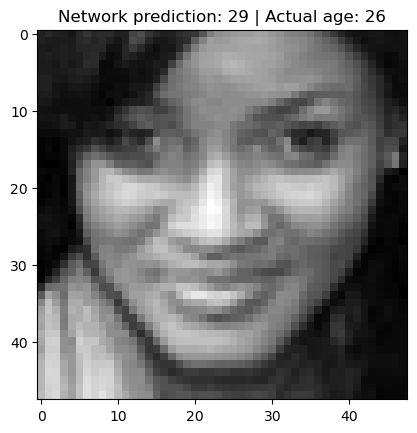

Iteration: 1506
Actual value: 17


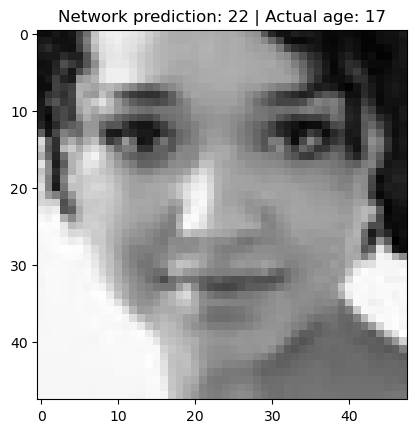

Iteration: 1507
Actual value: 1


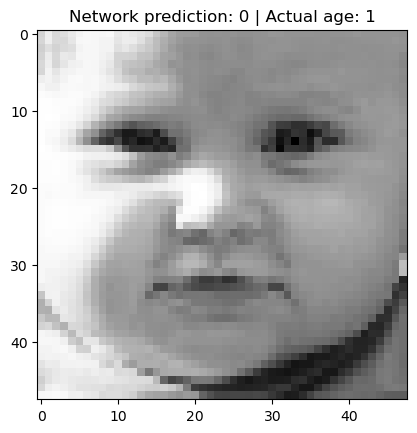

Iteration: 1508
Actual value: 43


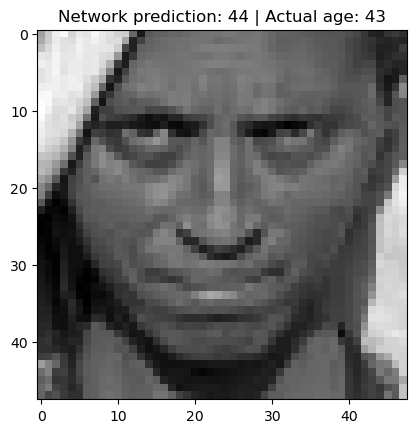

Iteration: 1509
Actual value: 35


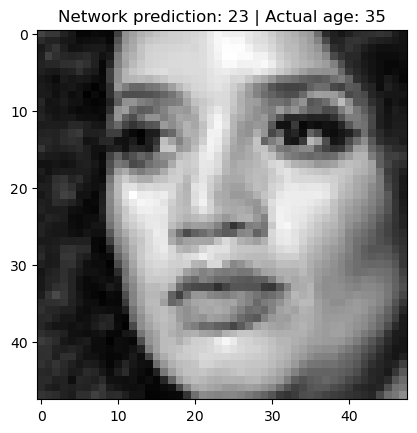

Iteration: 1510
Actual value: 41


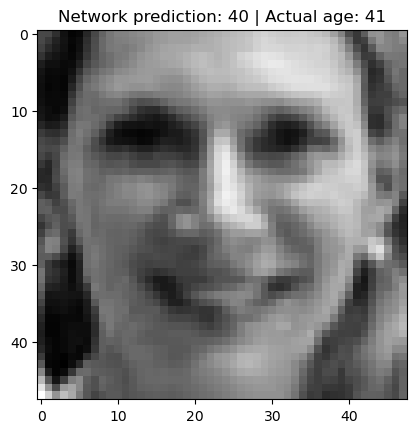

Iteration: 1511
Actual value: 23


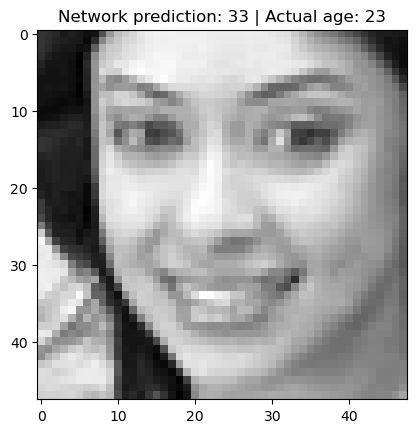

Iteration: 1512
Actual value: 1


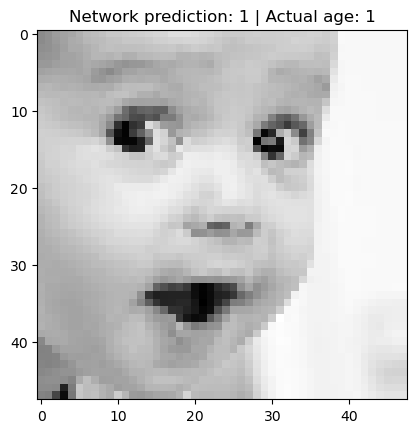

Iteration: 1513
Actual value: 1


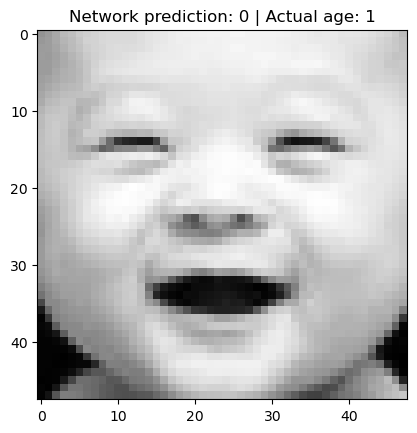

Iteration: 1514
Actual value: 27


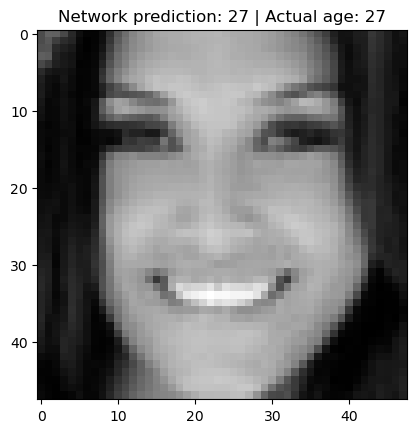

Iteration: 1515
Actual value: 42


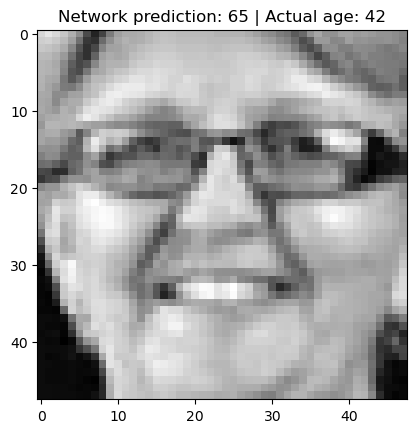

Iteration: 1516
Actual value: 1


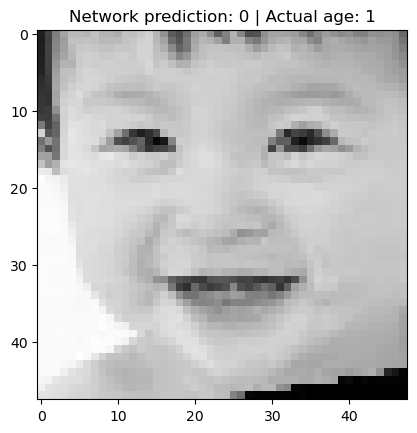

Iteration: 1517
Actual value: 46


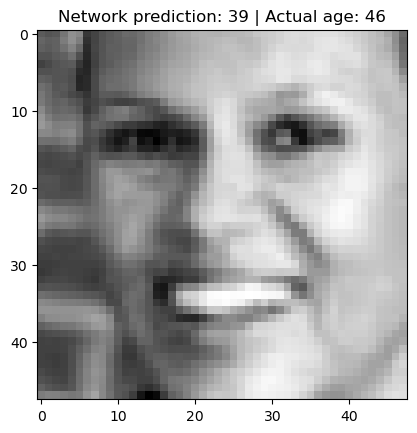

Iteration: 1518
Actual value: 23


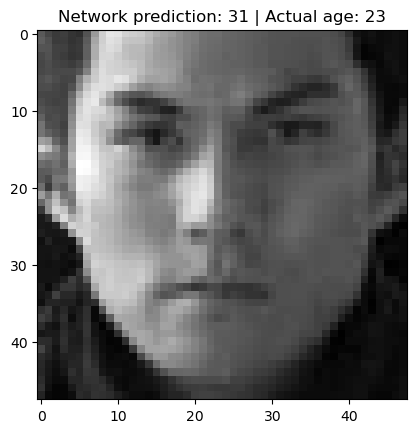

Iteration: 1519
Actual value: 61


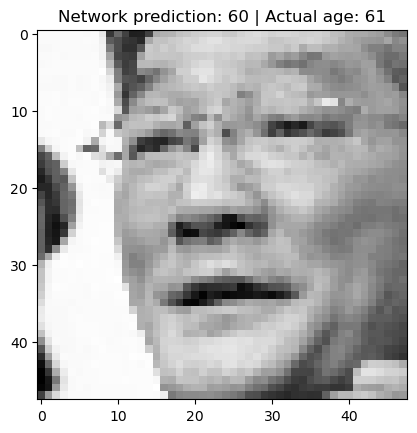

Iteration: 1520
Actual value: 1


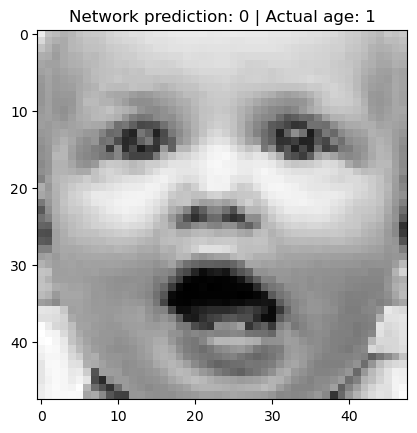

2


In [32]:
import random as random
ct = 0
for i in range(1500, 1520):
    print("Iteration: " + str(i + 1))
    print("Actual value: " + str(y_test["age"][i]))
    plt.figure()
    plt.imshow(X_test[i][:, :, 0], cmap='gray')
    plt.title(f"Network prediction: {results[i]} | Actual age: {y_test['age'][i]}")
    plt.show()
    if (y_test["age"][i] == results[i]):
        ct = ct + 1
print(ct)


TODO: fix vizualizations for age and ethnicity